In [1]:
import pickle
import bz2
from sklearn.neighbors import NearestNeighbors
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random

In [2]:
filenames = pickle.load(
    open('./filenames.pickle','rb')
)


In [5]:
def decompress_pickle(file):
 data = bz2.BZ2File(file, "rb")
 data = pickle.load(data)
 return data

In [7]:
#pickle_file = "./features.pickle"
#features_list = decompress_pickle(pickle_file)
features_list = pickle.load(
   open("./features.pickle", "rb")
)

UnpicklingError: pickle data was truncated

In [69]:
num_images = len(filenames)
num_features_per_image = len(features_list[0])
print("Number of images = ", num_images)
print("Number of features per image = ", num_features_per_image)

Number of images =  8677
Number of features per image =  100352


In [40]:
neighbors = NearestNeighbors(n_neighbors=5,
                             algorithm='brute',
                            metric='euclidean').fit(features_list)

distances, indices = neighbors.kneighbors([features_list[0]])

In [56]:
print(distances)

[[0.         0.94793086 0.9510299  0.95806371 0.98677213]]


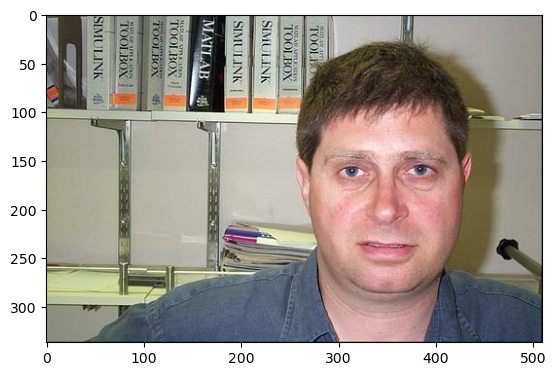

In [41]:
plt.imshow(mpimg.imread(filenames[0]))

In [45]:
print(filenames[indices[0][0]])
print(filenames[0])

./caltech101/Faces/image_0001.jpg
./caltech101/Faces/image_0001.jpg


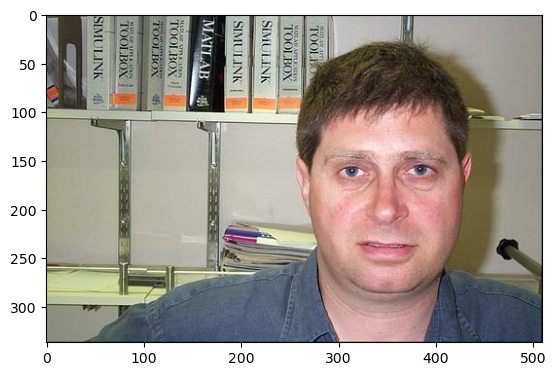

In [43]:
plt.imshow(mpimg.imread(filenames[indices[0][0]]))

In [46]:
for i in range(5):
    print(distances[0][i])

0.0
0.9479308633824145
0.9510298981344059
0.9580637130993411
0.9867721313631249


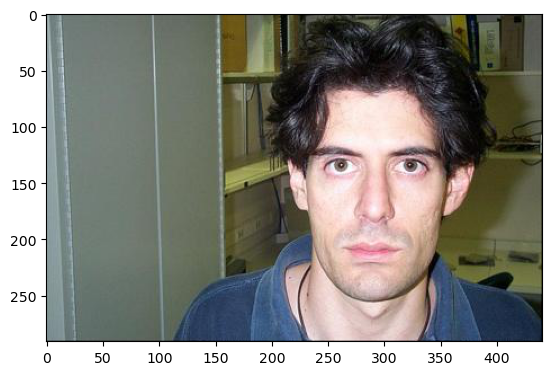

In [59]:
plt.imshow(mpimg.imread(filenames[indices[0][4]]))

In [109]:
# Helper function to get the classname
def classname(str):
    return str.split('/')[-2]


# Helper function to get the classname and filename
def classname_filename(str):
    return str.split('/')[-2] + '/' + str.split('/')[-1]


# Helper functions to plot the nearest images given a query image
def plot_images(filenames, distances):
    images = []
    for filename in filenames:
        images.append(mpimg.imread(filename))
    plt.figure(figsize=(20, 10))
    columns = 4
    #print(len(images))
    for i, image in enumerate(images):
        ax = plt.subplot(len(images), columns, i + 1)
        if i == 0:
            ax.set_title("Query Image\n" + classname_filename(filenames[i]))
        else:
            ax.set_title("Similar Image\n" + classname_filename(filenames[i]) +
                         "\nDistance: " +
                         str(float("{0:.2f}".format(distances[i]))))
        plt.imshow(image)
        # To save the plot in a high definition format i.e. PDF, uncomment the following line:
        #plt.savefig('results/' + str(random.randint(0,10000))+'.pdf', format='pdf', dpi=1000)
        # We will use this line repeatedly in our code.


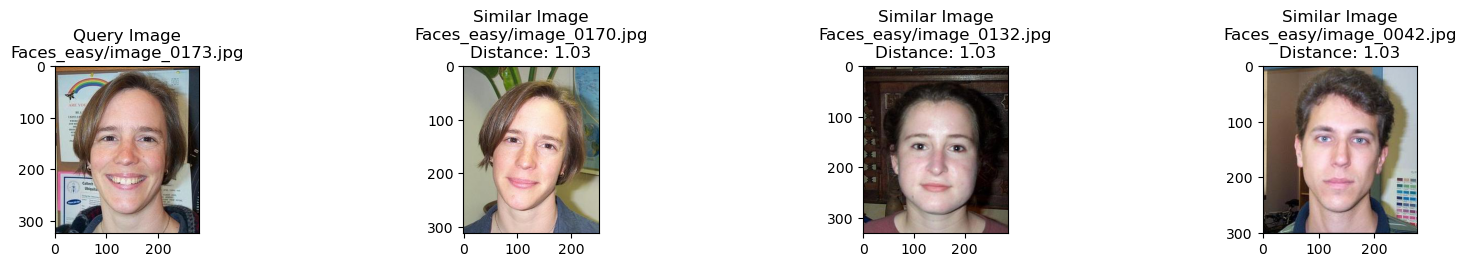

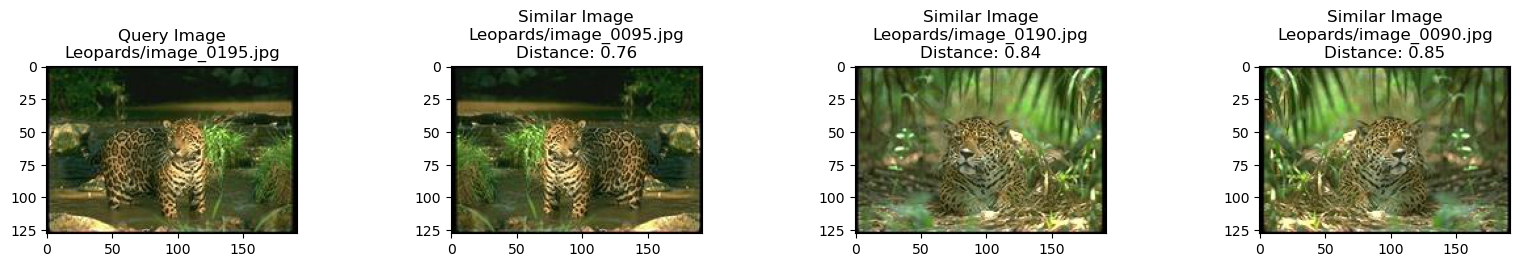

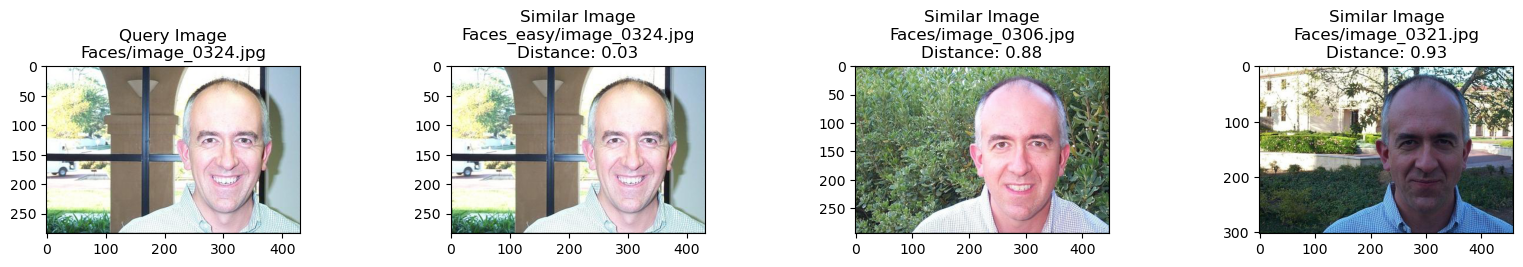

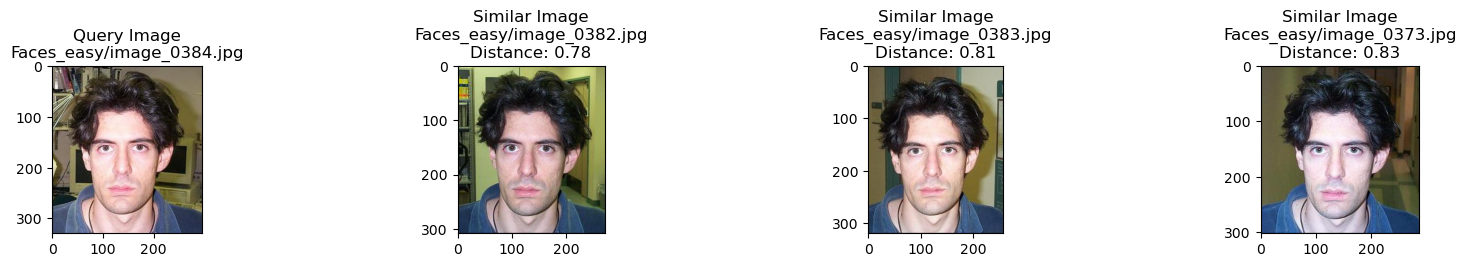

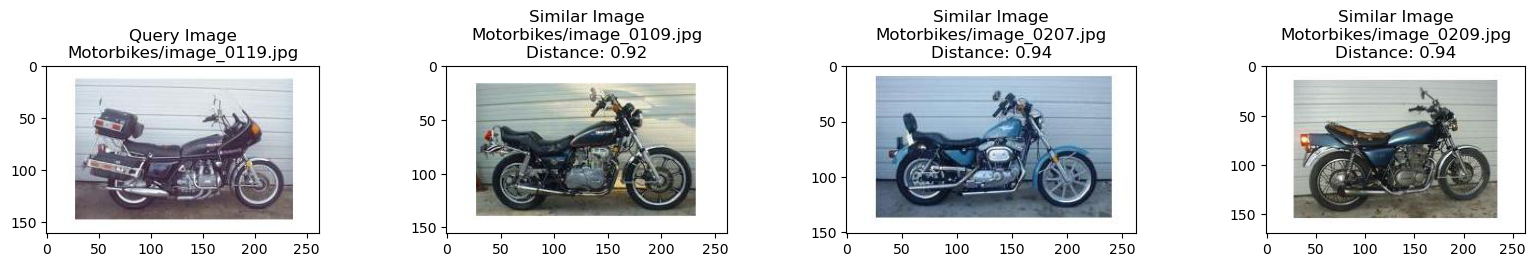

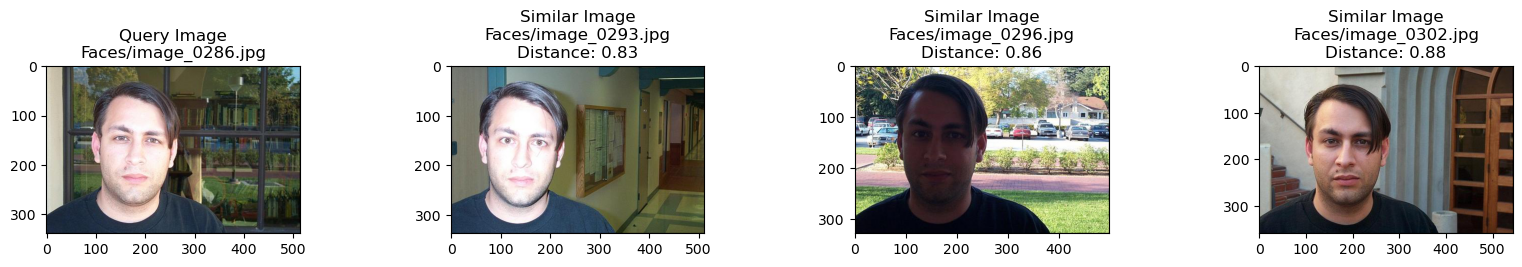

In [112]:
for i in range(6):
    random_image_index = random.randint(0,len(features_list))
    distances, indices = neighbors.kneighbors([
        features_list[random_image_index]
    ])
    similar_image_paths = [filenames[random_image_index]] + \
        [filenames[indices[0][i]] for i in range(1, 4)]
    plot_images(similar_image_paths, distances[0])
    #print(similar_image_paths)
    #print(distances[0])

In [114]:
num_feature_dimensions = 100

In [119]:
# implement dimensionality using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=num_feature_dimensions)
pca.fit(features_list)
feature_list_compressed = pca.transform(features_list)

In [ ]:
# For speed and clarity, we'll analyze about the first half of the dataset
selected_features = feature_list_compressed[:4000]
selected_class_ids = class_ids[:4000]

In [120]:
# Explain the importance of first 20 features
print(pca.explained_variance_ratio_[0:20])

[0.17165687 0.06203269 0.02824309 0.01594462 0.01429072 0.01234093
 0.01217385 0.01014996 0.00955811 0.00847043 0.00799644 0.00693853
 0.00661781 0.00628807 0.00607983 0.00585355 0.00559179 0.00522669
 0.00512712 0.00493264]


/tmp/ipykernel_521345/2039165267.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn')


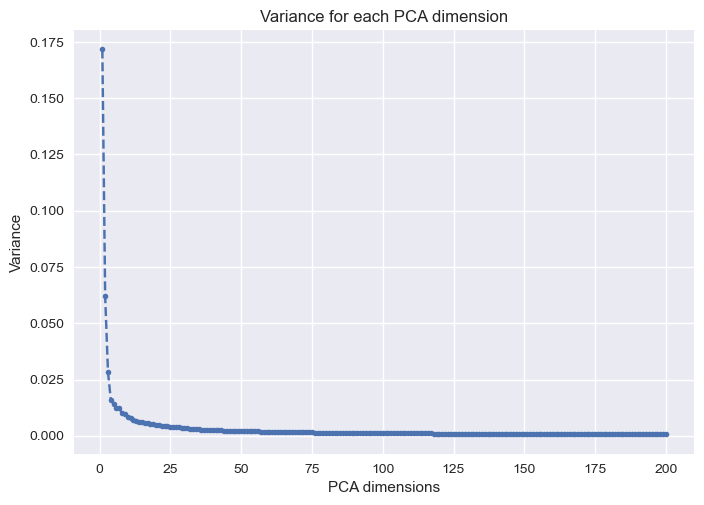

In [125]:
# visualization of the importance of the first 200 dimensions
pca = PCA(200)
pca.fit(features_list)
matplotlib.style.use('seaborn')
plt.plot(range(1,201),
         pca.explained_variance_ratio_,'o--', markersize=4)
plt.title('Variance for each PCA dimension')
plt.xlabel('PCA dimensions')
plt.ylabel('Variance')
plt.grid(True)
plt.show()


In [130]:
# visulization of perfomance of various dimensions
pca_dimensions = [1,2,3,4,5,10,20,50,75,100,150,200]
pca_accuracy = []
pca_time = []

for dimensions in pca_dimensions:
        # perform PCA
        pca = PCA(n_components = dimensions)
        pca.fit(features_list)
        feature_list_compressed = pca.transform(features_list[:])
        
        # calculate the accuracy over the compressed_features
        accuracy, time_taken = accuracy_calculator(feature_list_compressed[:])
        pca_time.append(accuracy)I am lookinI am lookin
        print("For PCA Dimensions = ", dimensions,
              ",\tAccuracy =", accuracy,"%",",\tTime",pca_time[-1])
    
        


NameError: name 'accuracy_calculator' is not defined

In [ ]:
plt.plot(pca_time, pca_accuracy,"o--",markersize=4)
for label, x, y in zip(pca_dimensions, pca_time, pca_accuracy):
    plt.annotate(label,xy=(x,y), ha='right',va='bottom')
    plt.title('Test time vs accuracy for each ')